## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [7]:
#Importera pandas
import pandas as pd

#Ladda in data från CSV-fil
df_home = pd.read_csv("Real_estate.csv") 
df_home = pd.DataFrame(df_home)

# Visa första 5 raderna
df_home.head() 
print(df_home.head())

#Visa antal rader och kolumner
rader = len(df_home)
kolumner = len(df_home.columns)
print(f"Antal rader: {rader}") 
print(f"Antal kolumner: {kolumner}")

#Lista alla kolumner
columns = list(df_home.columns) 
print(columns)


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

Datasetet visar fastighetspriser i Taiwan och de olika faktorer som påverkar dessa priser. X-kolumnerna(input) representerar de faktorer som kan påverka priset, medan kolumnen Y(output) representerar själva fastighetspriset, dvs. det värde vi vill förutsäga. 

---

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [8]:
#Kolla efter saknade värden
print("Saknade värden per kolumn:")
print(df_home.isna().sum())


#Kolla efter duplikater
print("\nAntal dubletter (hela rader som är kopior):")
print(df_home.duplicated().sum())


#Visa statistik för numeriska kolumner
print("\nStatistik för numeriska kolumner:")
print(df_home.describe())


# TODO: Kolla efter outliers (extremvärden)
#df_home.boxplot(column=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area'])

cols = ['X2 house age', 
        'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 
        'Y house price of unit area']

Q1 = df_home[cols].quantile(0.25)
Q3 = df_home[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_home[cols] < (Q1 - 1.5 * IQR)) | (df_home[cols] > (Q3 + 1.5 * IQR))
rows_with_outliers = df_home[outliers.any(axis=1)]

# 👉 Print outlier rows
print(rows_with_outliers)


Saknade värden per kolumn:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Antal dubletter (hela rader som är kopior):
0

Statistik för numeriska kolumner:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to

**Slutsats**: [Är datan OK? Finns det problem?]

---

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1: [Välj en analys från instruktionerna]

**Fråga**: [Vad vill ni ta reda på?]

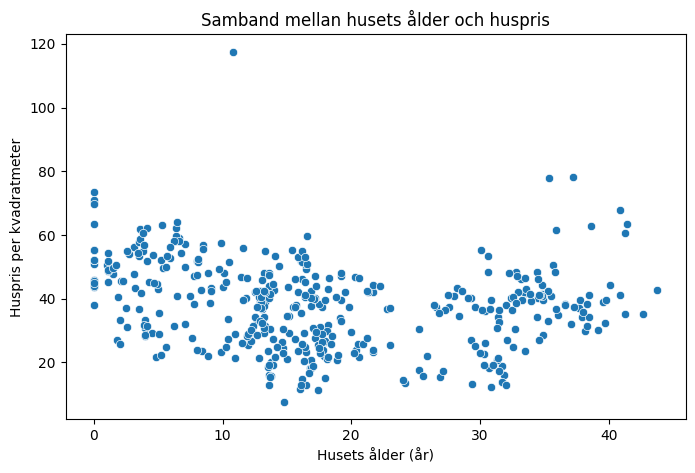

In [9]:
# TODO: Importera matplotlib
import matplotlib.pyplot as plt

# TODO: Gör din analys här
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_home, x="X2 house age", y="Y house price of unit area")
plt.title("Samband mellan husets ålder och huspris")
plt.xlabel("Husets ålder (år)")
plt.ylabel("Huspris per kvadratmeter")

# TODO: Skapa en graf
plt.show()
import seaborn as sns


**Resultat**:Grafen visar att nyare hus (lägre ålder) tenderar att ha något högre pris per kvadratmeter, medan äldre hus generellt ligger lägre i pris. Sambandet är dock ganska svagt, eftersom priserna varierar mycket även för hus med samma ålder. Totalt sett finns ett svagt negativt samband mellan husets ålder och priset.
---

### ANALYS 2: [Välj en till analys]

**Fråga**: [Vad vill ni ta reda på?]

In [11]:
# TODO: Gör din analys här


# TODO: Skapa en graf


**Resultat**: [Vad ser ni? 2-3 meningar]

---

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: Vi valde features som vi tror har störst påverkan på huspriset, till exempel ”house age”, ”distance to nearest MRT station”, ”number of convenience stores” och eventuellt “latitude” och “longitude”. Dessa valdes eftersom äldre hus ofta är billigare, närhet till kollektivtrafik och butiker ökar attraktiviteten, och läge (lat/lon) påverkar värdet på fastigheten.

In [12]:
# TODO: Importera sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# TODO: Välj features (X) och target (Y)
X = df_home[["X2 house age",
        "X3 distance to the nearest MRT station",
        "X4 number of convenience stores"]]

Y = df_home["Y house price of unit area"]

# TODO: Dela data i träning och test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### 4.2 Bygg och träna modellen

In [ ]:
# TODO: Skapa modellen


# TODO: Träna modellen


# TODO: Gör prediktioner på testdata


### 4.3 Utvärdera modellen

In [ ]:
# TODO: Beräkna R² score


# TODO: Beräkna MAE (Mean Absolute Error)


# TODO: Skapa en graf som visar prediktioner vs verkliga värden


**Resultat**: 
- R² Score: [Ditt värde här]
- MAE: [Ditt värde här]

**Diskussion**: [Är modellen bra eller dålig? Varför? 3-5 meningar]

---

## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.

### REKOMMENDATION 1: [Titel]

**Varför**: [Baserat på vilken analys?]

**Åtgärd**: [Vad ska familjen göra?]

**Effekt**: [Vad händer?]

---